In [1]:
# pip install tensorflow keras
# !pip install pandas numpy matplotlib
# !pip install plotly
!pip install pandas numpy scipy statsmodels scikit-learn tensorflow keras xgboost lightgbm matplotlib seaborn plotly plotly-express jupyter ipykernel


  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl.metadata (11 kB)
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.3 MB ? eta -:--:--
    --------------------------------------- 0.8/41.3 MB 2.0 MB/s eta 0:00:21
   - -------------------------------------- 1.0/41.3 MB 1.6 MB/s eta 0:00:25
   - -------------------------------------- 1.3/41.3 MB 1.8 MB/s eta 0:00:23
   - -------------------------------------- 1.8/41.3 MB 1.7 MB/s eta 0:00:24
   -- ------------------------------------- 2.4/41.3 MB 1.9 MB/s eta 0:00:20
   --- ------------------------------------ 3.1/41.3 MB 2.2 MB/s eta 0:00:18
   --- ------------------------------------ 3.7/41.3 MB 2.2 MB/s eta 0:00:17
   ---- ----------------------------------- 4.2/41.3 MB 2.3 MB/s eta 0:00:16
   ---- ----------------------------------- 4.7/41.3 MB 2.3 MB/s eta 0:00:16
   ----- ---------------------------------- 5.2/41.3 MB 2.4 MB/s eta 0:00:16
   ----- -----

Food Delivery Time Prediction

Food Delivery services like Zomato and Swiggy need to show the accurate time it will take to deliver your order to keep transparency with their customers. These companies use Machine Learning algorithms to predict the food delivery time based on how much time the delivery partners took for the same distance in the past. So, if you want to learn how to use Machine Learning for food delivery time prediction, this article is for you. This article will take you through food delivery time prediction with Machine Learning using Python.

Food Delivery Time Prediction
To predict the food delivery time in real-time, we need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, we need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance.

So, for this task, we need a dataset containing data about the time taken by delivery partners to deliver food from the restaurant to the delivery location. I found an ideal dataset with all the features for this task.

In the section below, I will take you through the task of Food Delivery Time Prediction with Machine Learning using Python.

Food Delivery Time Prediction using Python
I will start the task of food delivery time prediction by importing the necessary Python libraries and the dataset:

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import math

In [3]:
orders = pd.read_csv("deliverytime.txt")
orders.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0                    75.912471        Snack      motorcycle                24  
1                    77.813237        Snack         scooter                33  
2                    77.688400       Drinks      motorcycle                26  
3                    77.026494       Buffet      motorcycle                21  
4                    80.289982        Snack         scooter                30

In [4]:
#Let’s have a look at the column insights before moving forward
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [5]:
#Now let’s have a look at whether this dataset contains any null values or not
orders.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

#The dataset does not have any null values. Let’s move further!

Calculating Distance Between Two Latitudes and Longitudes
The dataset doesn’t have any feature that shows the difference between the restaurant and the delivery location. All we have are the latitude and longitude points of the restaurant and the delivery location. We can use the haversine formula to calculate the distance between two locations based on their latitudes and longitudes.

🧮 The Formula
Given two points:

Point 1: latitude = φ₁, longitude = λ₁
Point 2: latitude = φ₂, longitude = λ₂
Radius of Earth (R) ≈ 6,371 km
The Haversine formula is:

a = sin 2 (Δφ2) + cos (φ1)⋅cos⁡(φ2)⋅sin⁡2(Δλ2)a=sin 
2
 ( 
2
Δφ
​
 )+cos(φ 
1
​
 )⋅cos(φ 
2
​
 )⋅sin 
2
 ( 
2
Δλ
​
 )
c
=
2
⋅
arctan
⁡
2
(
a
,
1
−
a
)
c=2⋅arctan2( 
a
​
 , 
1−a
​
 )
d
=
R
⋅
c
d=R⋅c
Where:

Δ
φ
=
φ
2
−
φ
1
Δφ=φ 
2
​
 −φ 
1
​
  (difference in latitude in radians)
Δ
λ
=
λ
2
−
λ
1
Δλ=λ 
2
​
 −λ 
1
​
  (difference in longitude in radians)
d
d is the distance between the two points

In [6]:
## Set the earth's radius (in kilometers)
R = 6371

## Convert degrees to radians(Alternative)
# def deg_to_rad(degrees):
    # return degrees*(np.pi/180)


# Function to calculate the distance between two points using the haversine formula

def haversine(lat1,lon1,lat2,lon2):
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi/2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda/2) **2

    c = 2 * math.atan2(math.sqrt(a),math.sqrt(1-a))

    return R * c

# Calculate the distance between each pair of points

orders["distance"] = np.nan  # Creating a Vacant array for Storage

for i in range(len(orders)):
    orders.loc[i,"distance"] = haversine(orders.loc[i,"Restaurant_latitude"],orders.loc[i,"Restaurant_longitude"] , orders.loc[i,"Delivery_location_latitude"] ,
                                         orders.loc[i,"Delivery_location_longitude"])
    

In [7]:
orders.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)', 'distance'],
      dtype='object')

In [8]:
orders.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0                    75.912471        Snack      motorcycle                24   
1                    77.813237        Snack         scooter                33   
2                    77.688400       Drinks      motorcycle                26   
3                    77.026494       Buffet      motorcycle                21   
4                    80.289982        Snack         scooter                30   

    distance  
0   3.025149  
1  20.183530  
2   1.552758  
3   7.790401  
4   6.210138

We have now calculated the distance between the restaurant and the delivery location. We have also added a new feature in the dataset as distance

Data Exploration
Now let’s explore the data to find relationships between the features. I’ll start by looking at the relationship between the distance and time taken to deliver the food:

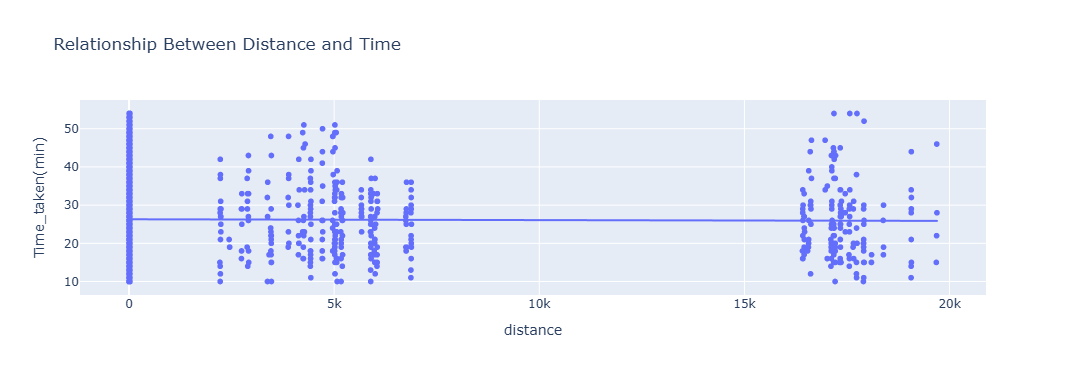

In [9]:
fig_distanceVStime = px.scatter(data_frame= orders , x = "distance"  , y = "Time_taken(min)" ,trendline= "ols" , title= "Relationship Between Distance and Time")

fig_distanceVStime.show()

There is a consistent relationship between the time taken and the distance travelled to deliver the food. It means that most delivery partners deliver food within 25-30 minutes, regardless of distance.

#Now let’s have a look at the relationship between the time taken to deliver the food and the age of the delivery partner:

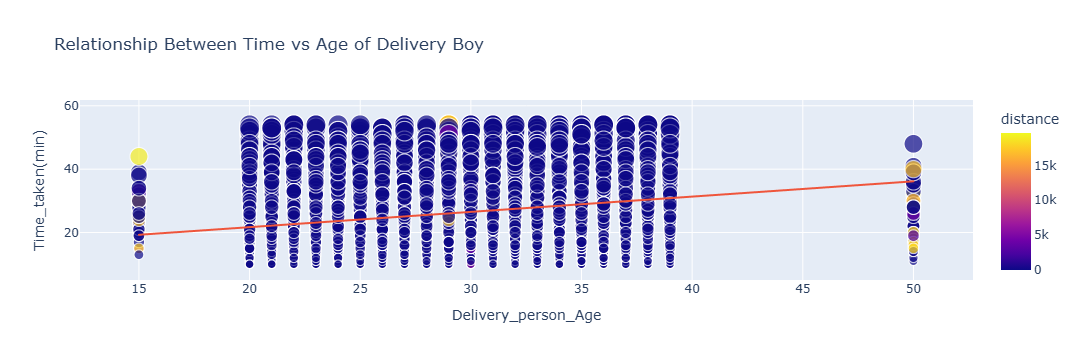

In [10]:
#Now let’s have a look at the relationship between the time taken to deliver the food and the age of the delivery partner:
fig_timeVSage = px.scatter(data_frame= orders , x = "Delivery_person_Age" , y = "Time_taken(min)" , size= "Time_taken(min)" , color= "distance"  , trendline= "ols" ,
                          title= "Relationship Between Time vs Age of Delivery Boy")
fig_timeVSage.show()

There is a linear relationship between the time taken to deliver the food and the age of the delivery partner. It means young delivery partners take less time to deliver the food compared to the elder partners.

#Now let’s have a look at the relationship between the time taken to deliver the food and the ratings of the delivery partner:

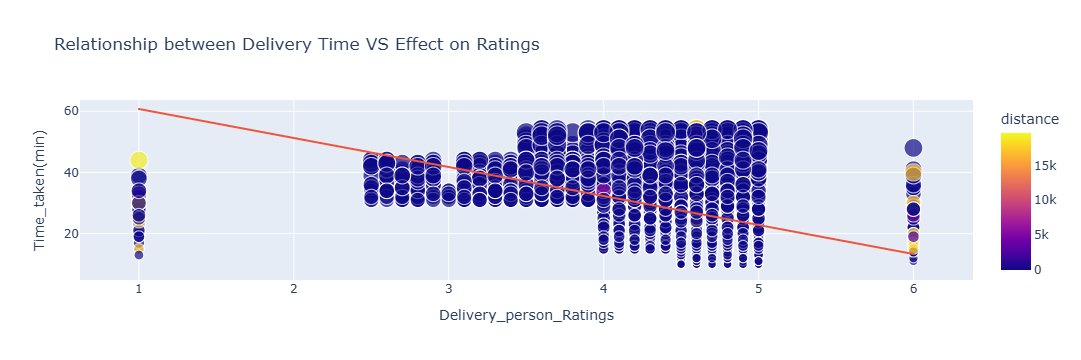

In [11]:
#Now let’s have a look at the relationship between the time taken to deliver the food and the ratings of the delivery partner:

fig_timeVSrating = px.scatter(data_frame= orders, x = "Delivery_person_Ratings" , y = "Time_taken(min)" , size = "Time_taken(min)" , color = "distance" , trendline= "ols",
                             title= "Relationship between Delivery Time VS Effect on Ratings")

fig_timeVSrating.show()

There is an inverse linear relationship between the time taken to deliver the food and the ratings of the delivery partner. It means delivery partners with higher ratings take less time to deliver the food compared to partners with low ratings.

#Now let’s have a look if the type of food ordered by the customer and the type of vehicle used by the delivery partner affects the delivery time or not:

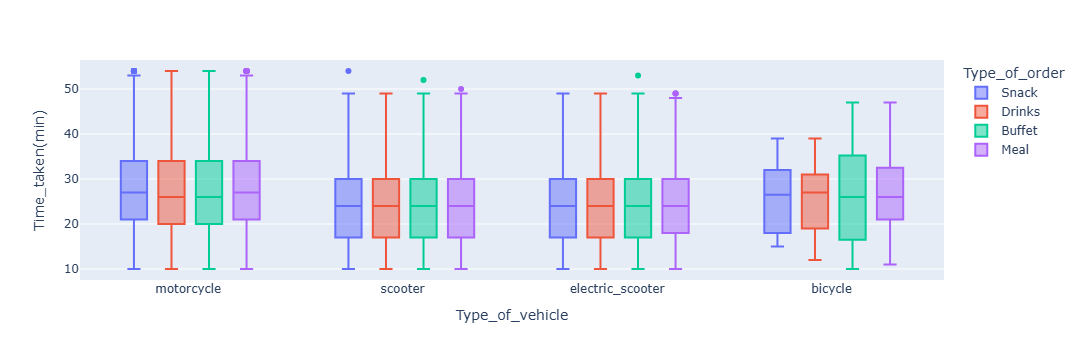

In [12]:
#Now let’s have a look if the type of food ordered by the customer and the type of vehicle used by the delivery partner affects the delivery time or not:

fig_foodtypeVSvehicletype = px.box(orders , x = "Type_of_vehicle" , y = "Time_taken(min)" , color= "Type_of_order")

fig_foodtypeVSvehicletype.show()


So there is not much difference between the time taken by delivery partners depending on the vehicle they are driving and the type of food they are delivering.

So the features that contribute most to the food delivery time based on our analysis are:

- age of the delivery partner
- ratings of the delivery partner
- distance between the restaurant and the delivery location

In the section below, I will take you through how to train a Machine Learning model for food delivery time prediction.

--- Food Delivery Time Prediction Model


Now let’s train a Machine Learning model using an LSTM neural network model for the task of food delivery time prediction:

In [14]:
#Splitting Data 
from sklearn.model_selection import train_test_split
x = np.array(orders[["Delivery_person_Age","Delivery_person_Ratings","distance"]])
y= np.array(orders[["Time_taken(min)"]])

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.10,random_state=42)

# CREATE THE LSTM Neural Network Model
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128,return_sequences= True , input_shape = (xtrain.shape[1],1)))
model.add(LSTM(64,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()


Matplotlib is building the font cache; this may take a moment.
C:\Users\ahussain\Documents\Anaconda3\envs\py310_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
orders.columns

In [15]:
#Training the Model
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(xtrain,ytrain,batch_size = 1 ,epochs = 9)

Epoch 1/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 264s 6ms/step - loss: 75.5488
Epoch 2/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 242s 6ms/step - loss: 64.5336
Epoch 3/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 260s 6ms/step - loss: 62.6679
Epoch 4/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 277s 7ms/step - loss: 60.2666
Epoch 5/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 287s 7ms/step - loss: 59.7808
Epoch 6/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 286s 7ms/step - loss: 59.5722
Epoch 7/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 273s 7ms/step - loss: 58.7111
Epoch 8/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 287s 7ms/step - loss: 59.7947
Epoch 9/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 321s 8ms/step - loss: 58.7867


In [16]:
print("Food Delivery Time Prediction")
a = int(input("Age Of Delivery Person :  "))
b = float(input("Ratings of Previous Deliveries : "))
c = int(input("Total Distance  between Restaurant and Delivery Place "))

features = np.array([[a, b, c]])
print("predicted Delivery Time in Minutes = " , model.predict(features))

Food Delivery Time Prediction


Age Of Delivery Person :   32
Ratings of Previous Deliveries :  4
Total Distance  between Restaurant and Delivery Place  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
predicted Delivery Time in Minutes =  [[32.489376]]


So this is how you can use Machine Learning for the task of food delivery time prediction using the Python programming language.

Summary
To predict the food delivery time in real time, you need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, you need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance. I hope you liked this article on food delivery time prediction with Machine Learning using Python